In [4]:
from copy import copy
import datetime
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
train_data = pd.read_csv('dataset/train.csv')
train_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0


In [6]:
test_data = pd.read_csv('dataset/test.csv')
test_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,35,technician,single,secondary,no,89043,no,no,cellular,7,feb,101,2,184,2,success
1,1,37,services,married,secondary,no,64372,yes,no,cellular,7,jul,158,3,241,0,unknown
2,2,31,services,single,secondary,no,31606,yes,no,unknown,15,may,152,2,47,0,unknown
3,3,31,admin.,married,secondary,no,94826,yes,no,cellular,27,may,345,2,490,0,unknown
4,4,32,services,married,secondary,no,100401,no,no,cellular,7,jan,126,1,686,0,other


In [7]:
train_df = copy(train_data)
x = copy(train_df)
test_df = copy(test_data)

In [15]:
ID = test_data['id']
test_df['y'] = -99

In [16]:
all_df = pd.concat([x, test_df], ignore_index=True)

In [17]:
x.shape, test_df.shape, all_df.shape

((27100, 18), (18050, 18), (45150, 18))

In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27100 non-null  int64 
 1   age        27100 non-null  int64 
 2   job        27100 non-null  object
 3   marital    27100 non-null  object
 4   education  27100 non-null  object
 5   default    27100 non-null  object
 6   balance    27100 non-null  int64 
 7   housing    27100 non-null  object
 8   loan       27100 non-null  object
 9   contact    27100 non-null  object
 10  day        27100 non-null  int64 
 11  month      27100 non-null  object
 12  duration   27100 non-null  int64 
 13  campaign   27100 non-null  int64 
 14  pdays      27100 non-null  int64 
 15  previous   27100 non-null  int64 
 16  poutcome   27100 non-null  object
 17  y          27100 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [19]:
x.describe()

,id,age,balance,day,month,duration,campaign,pdays,previous,y
count,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000
mean,13549.500000,36.073284,47682.901771,16.747565,6.001919,229.325387,1.775830,432.482399,0.085720,0.077934
std,7823.240484,7.816417,31650.760036,8.569588,2.137665,204.939958,0.950045,252.150648,0.365889,0.268072
min,0.000000,22.000000,-6847.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6774.750000,31.000000,20015.750000,8.000000,5.000000,121.000000,1.000000,214.000000,0.000000,0.000000
50%,13549.500000,33.000000,47624.000000,17.000000,5.000000,158.000000,1.000000,432.000000,0.000000,0.000000
75%,20324.250000,37.000000,75330.000000,26.000000,7.000000,345.000000,2.000000,650.000000,0.000000,0.000000
max,27099.000000,90.000000,102121.000000,31.000000,11.000000,3076.000000,5.000000,870.000000,3.000000,1.000000


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18050 entries, 0 to 18049
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         18050 non-null  int64 
 1   age        18050 non-null  int64 
 2   job        18050 non-null  object
 3   marital    18050 non-null  object
 4   education  18050 non-null  object
 5   default    18050 non-null  object
 6   balance    18050 non-null  int64 
 7   housing    18050 non-null  object
 8   loan       18050 non-null  object
 9   contact    18050 non-null  object
 10  day        18050 non-null  int64 
 11  month      18050 non-null  object
 12  duration   18050 non-null  int64 
 13  campaign   18050 non-null  int64 
 14  pdays      18050 non-null  int64 
 15  previous   18050 non-null  int64 
 16  poutcome   18050 non-null  object
dtypes: int64(8), object(9)
memory usage: 2.3+ MB


In [20]:
test_df.describe()

,id,age,balance,day,month,duration,campaign,pdays,previous,y
count,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.0
mean,9024.500000,36.104266,47158.451801,16.763934,5.996454,229.315014,1.770083,436.171801,0.090859,-99.0
std,5210.730515,7.863805,31469.525699,8.571112,2.121859,208.796946,0.944872,251.392519,0.375801,0.0
min,0.000000,20.000000,-6838.000000,2.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,-99.0
25%,4512.250000,31.000000,19654.500000,8.000000,5.000000,121.000000,1.000000,219.250000,0.000000,-99.0
50%,9024.500000,33.000000,46886.000000,17.000000,5.000000,158.000000,1.000000,436.000000,0.000000,-99.0
75%,13536.750000,37.000000,74178.000000,26.000000,7.000000,345.000000,2.000000,654.000000,0.000000,-99.0
max,18049.000000,90.000000,102124.000000,31.000000,11.000000,3076.000000,4.000000,870.000000,3.000000,-99.0


In [21]:
all_df.describe()

,id,age,balance,day,month,duration,campaign,pdays,previous,y
count,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000,45150.000000
mean,11740.502215,36.085670,47473.237940,16.754109,5.999734,229.321240,1.773533,433.957342,0.087774,-39.531296
std,7245.862941,7.835323,31579.127347,8.570106,2.131338,206.488239,0.947974,251.851537,0.369888,48.534574
min,0.000000,20.000000,-6847.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,-99.000000
25%,5643.250000,31.000000,19890.500000,8.000000,5.000000,121.000000,1.000000,216.000000,0.000000,-99.000000
50%,11287.000000,33.000000,47360.500000,17.000000,5.000000,158.000000,1.000000,434.000000,0.000000,0.000000
75%,16930.750000,37.000000,74916.500000,26.000000,7.000000,345.000000,2.000000,652.000000,0.000000,0.000000
max,27099.000000,90.000000,102124.000000,31.000000,11.000000,3076.000000,5.000000,870.000000,3.000000,1.000000


# ・AGE

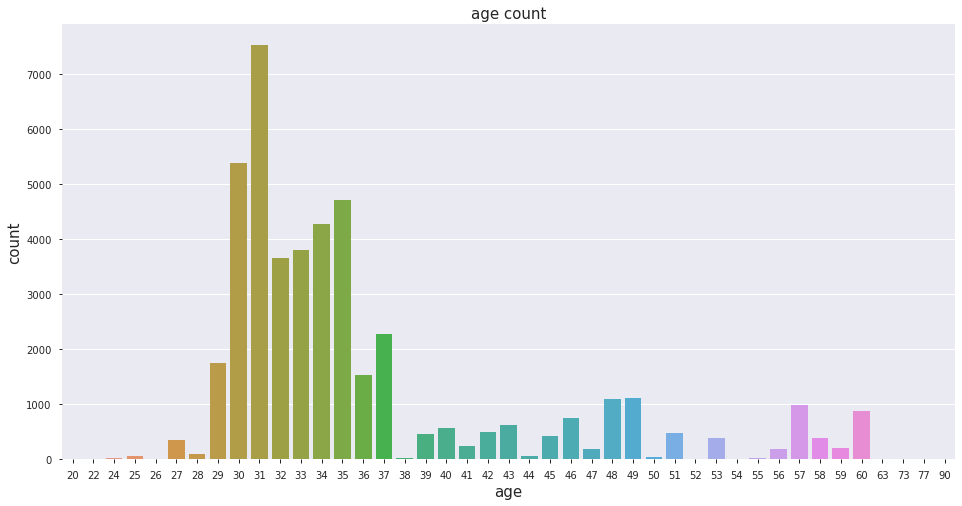

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='age', data=all_df)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('age count', fontsize=15)
sns.despine()

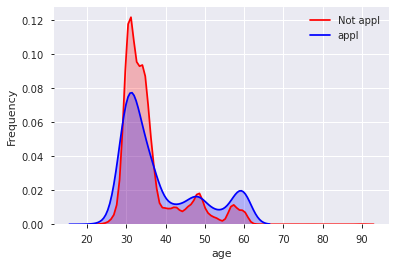

In [29]:
g = sns.kdeplot(x['age'][x['y'] == 0], color='red', shade = True)
g = sns.kdeplot(x['age'][x['y'] == 1], color='blue', shade = True)
g.set_xlabel('age')
g.set_ylabel('Frequency')
g = g.legend(['Not appl','appl'])

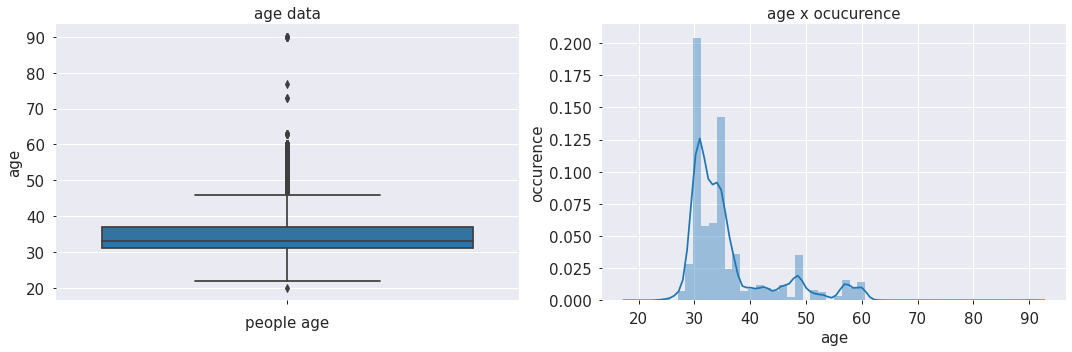

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='age', data=all_df, orient='v', ax=ax1)
ax1.set_xlabel('people age', fontsize=15)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('age data', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(all_df['age'], ax=ax2)
sns.despine(ax=ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.set_ylabel('occurence', fontsize=15)
ax2.set_title('age x ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [35]:
print('1º Quartile: ', all_df['age'].quantile(q = 0.25))
print('2º Quartile: ', all_df['age'].quantile(q = 0.50))
print('3º Quartile: ', all_df['age'].quantile(q = 0.75))
print('4º Quartile: ', all_df['age'].quantile(q = 1.00))
    
print('Ages above: ', all_df['age'].quantile(q = 0.75) + 
                      1.5*(all_df['age'].quantile(q = 0.75) - all_df['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  31.0
2º Quartile:  33.0
3º Quartile:  37.0
4º Quartile:  90.0
Ages above:  46.0 are outliers


In [36]:
def age_class(age):
    a = ''
    if age <= 31:
        a = 0
    elif age <= 33:
        a = 1
    elif age <= 37:
        a = 2
    elif age <= 46:
        a = 3
    else:
        a = 4
    return a

In [42]:
x['age_class'] = x['age'].map(age_class)
test_df['age_class'] = test_df['age'].map(age_class)
all_df['age_class'] = all_df['age'].map(age_class)

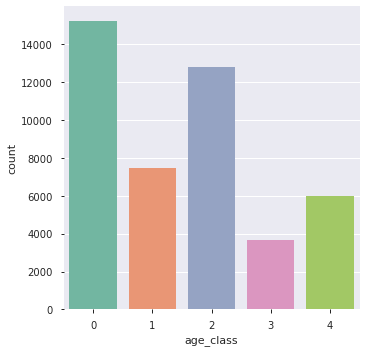

In [46]:
sns.catplot(x='age_class', kind='count', palette=('Set2'), data=all_df)

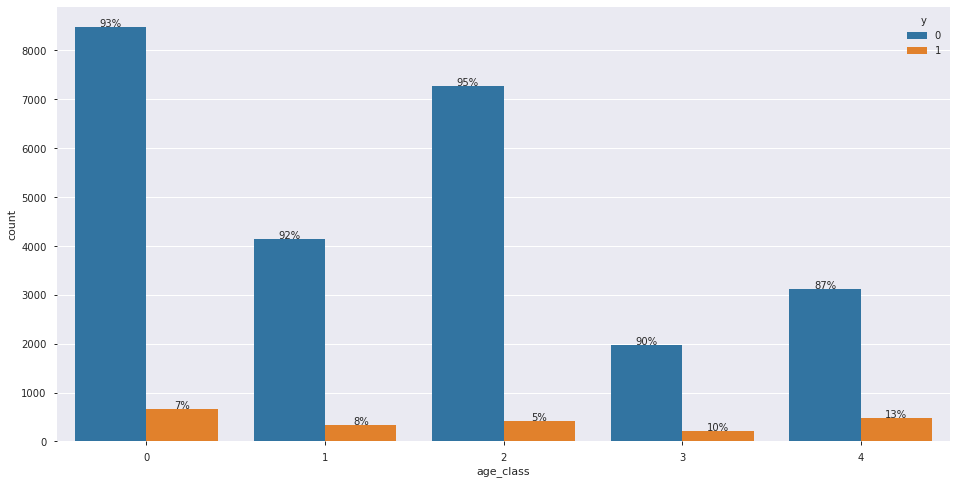

In [41]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x='age_class', data=x ,hue='y')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 10, '{0:.0%}'.format(height_l/total), ha='center')
    ax.text(right.get_x() + right.get_width()/2., height_r + 10, '{0:.0%}'.format(height_r/total), ha='center')

# ・JOB

# <時間>

In [11]:
print(pd.unique(x.month))
print(len(pd.unique(x.month)))

['nov' 'aug' 'may' 'apr' 'sep' 'jun' 'jul' 'feb' 'oct' 'jan' 'mar']
11


In [12]:
print(pd.unique(test_df.month))
print(len(pd.unique(test_df.month)))

['feb' 'jul' 'may' 'jan' 'jun' 'aug' 'apr' 'sep' 'nov' 'oct' 'mar']
11


In [13]:
month_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, 
              "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}

x['month'] = x['month'].map(month_dict)
x['month'] = x['month'].map(int, month_dict)
test_df['month'] = test_df['month'].map(month_dict)
test_df['month'] = test_df['month'].map(int, month_dict)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


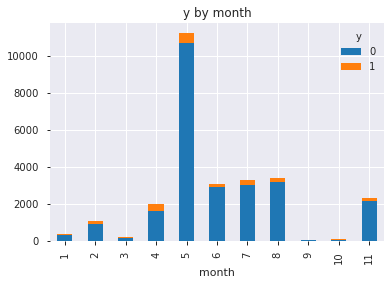

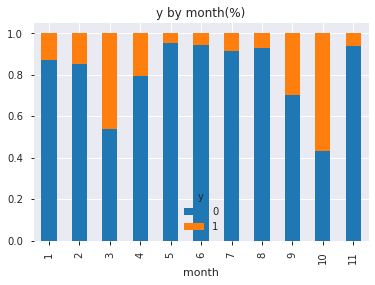

In [14]:
pd.crosstab(x.month, x.y).plot(kind='bar', stacked=True, title='y by month')
pd.crosstab(x.month, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by month(%)')

In [12]:
print(x['day'].value_counts())

27    4129
7     1919
18    1732
20    1693
16    1681
2     1495
15    1451
21    1328
17    1285
26    1172
30    1143
8     1142
12    1060
28    1044
4      872
3      806
13     618
6      502
14     435
9      376
11     324
23     268
5      199
19     140
22     124
25     116
29      38
10       4
31       3
1        1
Name: day, dtype: int64


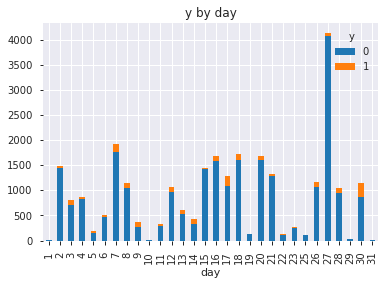

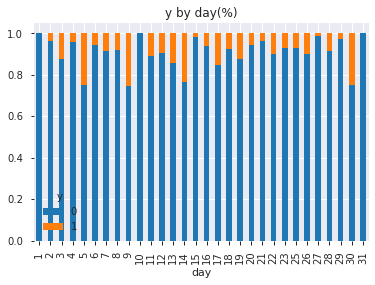

In [13]:
pd.crosstab(x.day, x.y).plot(kind='bar', stacked=True, title='y by day')
pd.crosstab(x.day, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by day(%)')

In [14]:
def month_div1(month):
    a = ''
    if month <= 3:
        a = 0
    elif month <= 6:
        a = 1
    elif month <= 9:
        a = 2
    else:
        a = 3
    return a

In [15]:
def month_div2(month):
    a = ''
    if month <= 4:
        a = 0
    elif month <= 8:
        a = 1
    else:
        a = 2
    return a

In [16]:
x['month_class'] = x['month'].map(month_div1)
test_df['month_class'] = test_df['month'].map(month_div1)

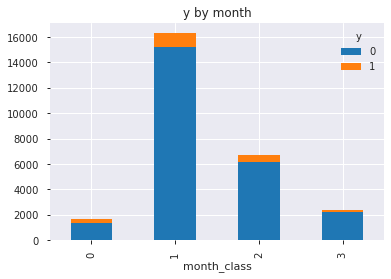

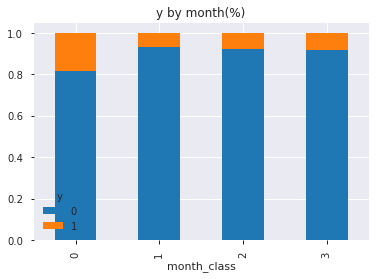

In [17]:
pd.crosstab(x.month_class, x.y).plot(kind='bar', stacked=True, title='y by month')
pd.crosstab(x.month_class, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by month(%)')

In [18]:
def day_div(day):
    a = ''
    if day <= 10:
        a = 0
    elif day <= 20:
        a = 1
    else:
        a =2
    return a

In [19]:
x['day_class'] = x['day'].map(day_div)
test_df['day_class'] = test_df['day'].map(day_div)

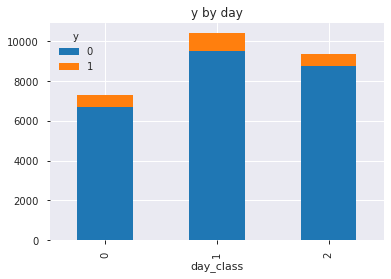

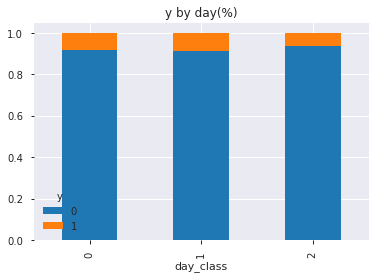

In [20]:
pd.crosstab(x.day_class, x.y).plot(kind='bar', stacked=True, title='y by day')
pd.crosstab(x.day_class, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by day(%)')

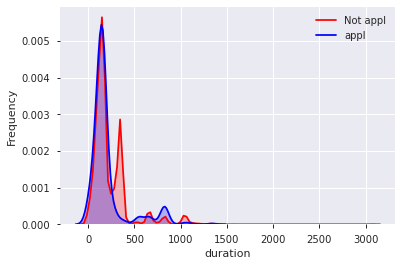

In [21]:
g = sns.kdeplot(x['duration'][x['y'] == 0], color='red', shade = True)
g = sns.kdeplot(x['duration'][x['y'] == 1], color='blue', shade = True)
g.set_xlabel('duration')
g.set_ylabel('Frequency')
g = g.legend(['Not appl','appl'])

In [22]:
tmp_x = copy(train_data)
tmp_test = copy(test_data)

x['duration'] = [sec // 60 for sec in tmp_x.duration]
tmp_test['duration'] = [sec // 60 for sec in tmp_test.duration]

del tmp_x, tmp_test

In [23]:
min_min = x['duration'].min()
min_max = x['duration'].max()

print('min:{}, max:{}'.format(min_min, min_max))

min:0, max:51


In [24]:
def duration_class(duration):
    a = ''
    if duration <= 0:
        a = 0
    elif duration <= 5:
        a = 1
    else:
        a = 2
    return a


In [25]:
x['duration_class'] = x['duration'].map(duration_class)
test_df['duration_class'] = test_df['duration'].map(duration_class)

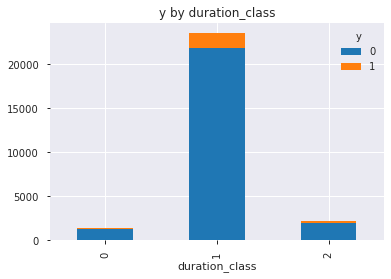

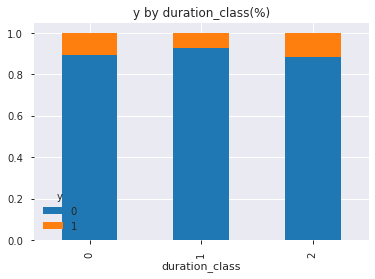

In [26]:
pd.crosstab(x.duration_class, x.y).plot(kind='bar', stacked=True, title='y by duration_class')
pd.crosstab(x.duration_class, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by duration_class(%)')

In [27]:
x['contact'].value_counts()

cellular     19147
unknown       6849
telephone     1104
Name: contact, dtype: int64

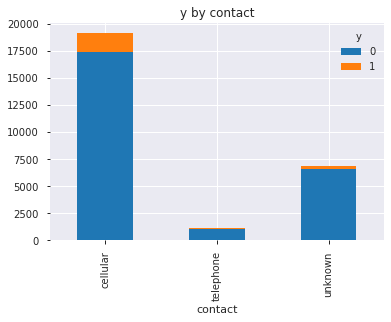

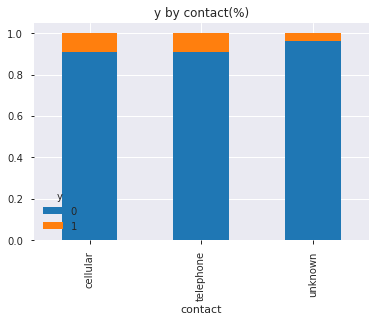

In [28]:
pd.crosstab(x.contact, x.y).plot(kind='bar', stacked=True, title='y by contact')
pd.crosstab(x.contact, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by contact(%)')

# <平均残高>

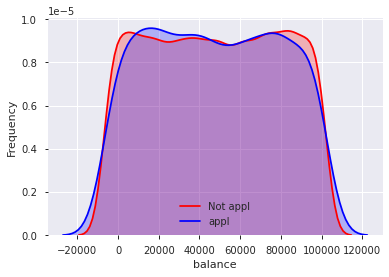

In [35]:
g = sns.kdeplot(x['balance'][x['y'] == 0], color='red', shade = True)
g = sns.kdeplot(x['balance'][x['y'] == 1], color='blue', shade = True)
g.set_xlabel('balance')
g.set_ylabel('Frequency')
g = g.legend(['Not appl','appl'])

# <ローンと債務不履行>

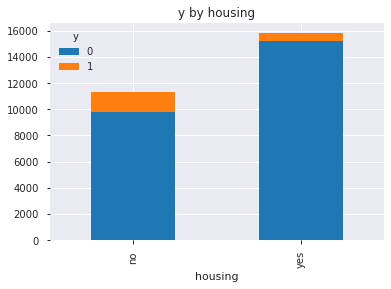

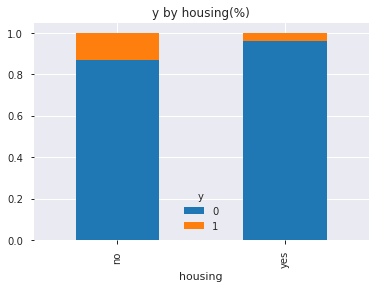

In [36]:
pd.crosstab(x.housing, x.y).plot(kind='bar', stacked=True, title='y by housing')
pd.crosstab(x.housing, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by housing(%)')

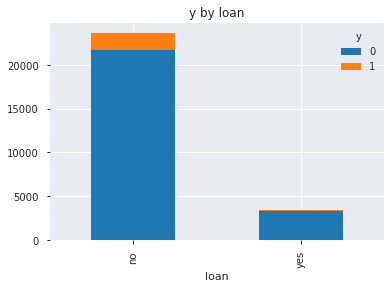

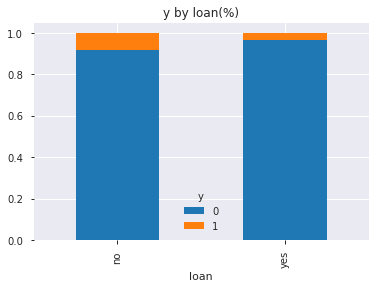

In [37]:
pd.crosstab(x.loan, x.y).plot(kind='bar', stacked=True, title='y by loan')
pd.crosstab(x.loan, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by loan(%)')

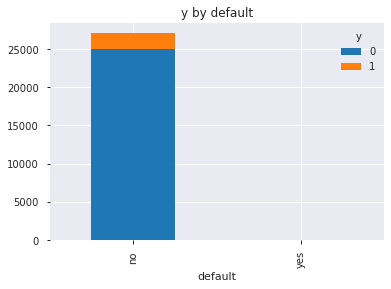

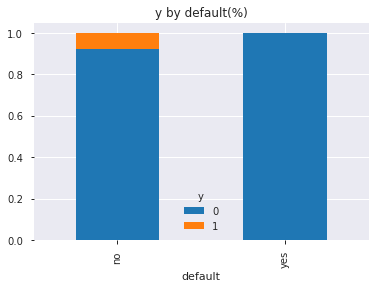

In [38]:
pd.crosstab(x.default, x.y).plot(kind='bar', stacked=True, title='y by default')
pd.crosstab(x.default, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by default(%)')

# <ステータス>

In [ ]:
pd.crosstab(x.marital, x.y).plot(kind='bar', stacked=True, title='y by marital')
pd.crosstab(x.marital, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by marital(%)')

In [ ]:
pd.crosstab(x.education, x.y).plot(kind='bar', stacked=True, title='y by education')
pd.crosstab(x.education, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by education(%)')

In [ ]:
pd.crosstab(x.job, x.y).plot(kind='bar', stacked=True, title='y by job')
pd.crosstab(x.job, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by job(%)')

In [ ]:
x['job'].value_counts()

In [ ]:
test_df['job'].value_counts()

In [ ]:
test_df[test_df['job'] == 'unknown']

In [ ]:
find_df = x[
            (26 <= x['age'])
          &(x['age'] <= 32)
          & (x['marital'] == 'married')
          & (x['default'] == 'no')
          & (x['housing'] == 'no')
          & (x['loan'] == 'no')
          & (9000 <= x['balance'])
          & (x['balance'] <= 12000)
         ]

print(find_df['job'].value_counts())

In [ ]:
find_df.groupby('job').median()['balance']

In [ ]:
test_df['job'].iloc[10810] = 'management'

del find_df

# <キャンペーン関連>

In [ ]:
train_data[((train_data['pdays'] == -1)
           | (train_data['pdays'] == 0))
           & (train_data['y'] == 1)]

In [ ]:
train_data[((train_data['pdays'] == -1)
           | (train_data['pdays'] == 0))].count()['id']

In [ ]:
tmp_x = copy(train_data)
tmp_test = copy(test_data)

x['pdays'] = [days // 30 for days in tmp_x.pdays]
test_df['pdays'] = [days // 30 for days in tmp_test.pdays]

del tmp_x, tmp_test

In [ ]:
pd.crosstab(x.pdays, x.y).plot(kind='bar', stacked=True, title='y by pdays')
pd.crosstab(x.pdays, x.y, normalize='index').plot(kind='bar', stacked=True, title='y by pdays(%)')

In [ ]:
x[['previous', 'y']].groupby(['previous'], as_index=False).mean().sort_values(by='previous')

In [ ]:
x[['campaign', 'y']].groupby(['campaign'], as_index=False).mean().sort_values(by='campaign')

In [ ]:
x[x['campaign'] == 5]

In [ ]:
def campaign_contact1(campaign):
    a = ''
    if campaign >= 1:
        a = 0
    else:
        a = 0
    return a

In [ ]:
def campaign_contact2(campaign):
    a = ''
    if campaign == 0:
        a = 0
    elif campaign == 1:
        a = 1
    elif campaign == 2:
        a = 2
    elif campaign == 3:
        a = 3
    else:
        a = 4
    return a

In [ ]:
x['campaign_contact'] = x['campaign'].map(campaign_contact1)
test_df['campaign_contact'] = test_df['campaign'].map(campaign_contact1)

In [ ]:
x[['campaign_contact', 'y']].groupby(['campaign_contact'], as_index=False).mean().sort_values(by='campaign_contact')

In [ ]:
x[['poutcome', 'y']].groupby(['poutcome'], as_index=False).mean().sort_values(by='poutcome')

In [ ]:
x['success'] = [1 if i == 'success' else 0 for i in x.poutcome]
test_df['success'] = [1 if i == 'success' else 0 for i in test_df.poutcome]

In [ ]:
x[['success', 'y']].groupby(['success'], as_index=False).mean().sort_values(by='success')

# <相関>

In [67]:
x_tmp = copy(x)

In [68]:
x_tmp.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,y,month_class,day_class,duration_class,age_class
0,0,31,services,married,secondary,no,12294,yes,no,cellular,...,1,3,498,0,other,0,3,2,1,1
1,1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,...,2,2,702,0,unknown,1,2,2,1,0
2,2,35,management,married,tertiary,no,12252,yes,no,cellular,...,5,1,826,0,failure,0,3,1,1,1
3,3,31,technician,married,secondary,no,99121,yes,yes,unknown,...,10,2,120,0,failure,0,1,1,2,1
4,4,48,unemployed,married,primary,no,42005,yes,no,telephone,...,2,1,273,0,unknown,0,1,0,1,2


In [69]:
x_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              27100 non-null  int64 
 1   age             27100 non-null  int64 
 2   job             27100 non-null  object
 3   marital         27100 non-null  object
 4   education       27100 non-null  object
 5   default         27100 non-null  object
 6   balance         27100 non-null  int64 
 7   housing         27100 non-null  object
 8   loan            27100 non-null  object
 9   contact         27100 non-null  object
 10  day             27100 non-null  int64 
 11  month           27100 non-null  int64 
 12  duration        27100 non-null  int64 
 13  campaign        27100 non-null  int64 
 14  pdays           27100 non-null  int64 
 15  previous        27100 non-null  int64 
 16  poutcome        27100 non-null  object
 17  y               27100 non-null  int64 
 18  month_

In [72]:
x_tmp = x[['month_class', 'day_class', 'age_class', 'duration_class', 'y']]

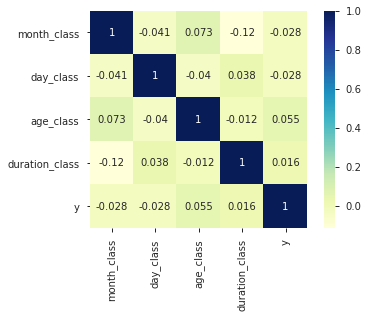

In [74]:
corr = x_tmp.corr()
sns.heatmap(corr, square=True, annot=True, cmap="YlGnBu")

In [ ]:
del x_tmp, corr

# <数値変換>

In [ ]:
x.info()

In [ ]:
test_df.info()

In [ ]:
drop_col = ['month', 'day', 'duration', 'age', 'campaign', 'poutcome']

x = x.drop(columns=drop_col)

train_df = train_data.drop(columns=drop_col)
test_df = test_df.drop(columns=drop_col)

In [ ]:
main_df = pd.concat([x, test_df], ignore_index=True)

In [ ]:
num_features = ['balance']

for col in num_features:
    scaler = StandardScaler()
    scaler.fit(np.array(main_df[col].values).reshape(-1, 1))
    x[col] = scaler.transform(np.array(train_df[col].values).reshape(-1, 1))
    
for col in num_features:
    scaler = StandardScaler()
    scaler.fit(np.array(main_df[col].values).reshape(-1, 1))
    test_df[col] = scaler.transform(np.array(test_df[col].values).reshape(-1, 1))

In [ ]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
               'contact']

for col in cat_features:
    cat = set(x[col].unique().tolist() + test_df[col].unique().tolist())
    
    x[col] = pd.Categorical(x[col], categories=cat)
    test_df[col] = pd.Categorical(test_df[col], categories=cat)

In [ ]:
x = pd.get_dummies(x, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

In [ ]:
x.info()

In [ ]:
test_df.info()

In [ ]:
now = datetime.datetime.now()

fname_x = 'dataset/train_' + now.strftime('%d_%H%M') + '.csv'
fname_test = 'dataset/test_' + now.strftime('%d_%H%M') + '.csv'

x.to_csv(fname_x, index=False)
test_df.to_csv(fname_test, index=False)